# DAEN 690 Capstone Project

## Import Libraries

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
import numpy as np
from datetime import datetime, timedelta

## Importing Dataset, Creating DataFrame, and Standardizing Data

### Import Dataset

In [3]:
#load Dataset
#Example input for file name is USM00072712-data.txt
file = input("Please enter file name: ")
#Entering in the city name will be used for the plots in the EDA section
city = input("Please input the station's city name: ")
df = pd.read_csv(file, sep = '\t', header = None)

In [4]:
#Raw Text File
df

,0
0,#USM00072528 1929 12 16 99 1130 3 ...
1,31 -9999 -9999 215 -9999 -9999 -9999 90 ...
2,30 -9999 -9999 250 -9999 -9999 -9999 90 ...
3,30 -9999 -9999 500 -9999 -9999 -9999 90 ...
4,#USM00072528 1929 12 16 99 2130 4 ...
...,...
5106217,10 9707 1000 30711B -443B 5 398 56 ...
5106218,20 9712 995 30744B -442B 5 398 55 ...
5106219,20 9827 924 31236B -458B 5 393 55 ...
5106220,20 9842 911 31335B -463B 5 391 57 ...


In [5]:
#This saves the id_number to be used in the standardize_dataset function
id_number = file.split('-')[0]

In [6]:
#This function helps to standardize the dataset using the following steps:
#1. Parsing the text file
#2. Assiging the parsed text to columns in our DataFrame
#3. Combining the header records and data records
#4. Dropping any null rows
#5. Assigning the correct data types to our columns
#6. Adding date and datetime values
#7. Returning the standardized DataFrame
def standardize_dataset(id_number, df):
#Header Records    
    id_ = []
    year = []
    month = []
    day = []
    hour = []
    reltime = []
    numlev = []
    p_src = []
    np_src = []
    lat = []
    lon = []
#Data Records    
    lvltyp1 = []
    lvltyp2 = []
    etime = []
    press = []
    pflag = []
    gph = []
    zflag = []
    temp = []
    tflag = []
    rh = []
    dpdp = []
    wdir = []
    wspd = []

#Parsing data from text file        
    for line in df[0]:
        if id_number in line:
            id_.append(line[0:12].strip())
            year.append(line[13:17].strip())
            month.append(line[17:20].strip())
            day.append(line[20:23])
            hour.append(line[23:26])
            reltime.append(line[27:31])
            numlev.append(line[33:36])
            p_src.append(line[37:45])
            np_src.append(line[46:54])
            lat.append(line[56:62])
            lon.append(line[64:71])
            lvltyp1.append(None)
            lvltyp2.append(None)
            etime.append(None)
            press.append(None)
            pflag.append(None)
            gph.append(None)
            zflag.append(None)
            temp.append(None)
            tflag.append(None)
            rh.append(None)
            dpdp.append(None)
            wdir.append(None)
            wspd.append(None)
        else:
            id_.append(None)
            year.append(None)
            month.append(None)
            day.append(None)
            hour.append(None)
            reltime.append(None)
            numlev.append(None)
            p_src.append(None)
            np_src.append(None)
            lat.append(None)
            lon.append(None)
            lvltyp1.append(line[0:1].strip())
            lvltyp2.append(line[1:2].strip())
            etime.append(line[3:8].strip())
            press.append(line[9:15].strip())
            pflag.append(line[15:16].strip())
            gph.append(line[16:21].strip())
            zflag.append(line[21:22].strip())
            temp.append(line[22:27].strip())
            tflag.append(line[27:28].strip())
            rh.append(line[28:33].strip())
            dpdp.append(line[33:39].strip())
            wdir.append(line[40:45].strip())
            wspd.append(line[46:51].strip())

#Adding parsed data to data frame.    
    df = pd.DataFrame({
        'id_': id_,
        'year': year,
        'month': month,
        'day': day,
        'hour': hour,
        'reltime': reltime,
        'numlev': numlev,
        'p_src': p_src,
        'np_src': np_src,
        'lat': lat,
        'lon': lon,
        'lvltyp1': lvltyp1,
        'lvltyp2': lvltyp2,
        'etime': etime,
        'press': press,
        'pflag': pflag,
        'gph': gph,
        'zflag': zflag,
        'temp': temp,
        'tflag': tflag,
        'rh': rh,
        'dpdp': dpdp,
        'wdir': wdir,
        'wspd': wspd})
    
 #Combining header and data rows.    
    df['id_'].fillna(method = 'ffill', inplace = True)
    df['year'].fillna(method = 'ffill', inplace = True)
    df['month'].fillna(method = 'ffill', inplace = True)
    df['day'].fillna(method = 'ffill', inplace = True)
    df['hour'].fillna(method = 'ffill', inplace = True)
    df['reltime'].fillna(method = 'ffill', inplace = True)
    df['numlev'].fillna(method = 'ffill', inplace = True)
    df['p_src'].fillna(method = 'ffill', inplace = True)
    df['np_src'].fillna(method = 'ffill', inplace = True)
    df['lat'].fillna(method = 'ffill', inplace = True)
    df['lon'].fillna(method = 'ffill', inplace = True)

#Drop any null rows    
    df = df.dropna()

#Assigning Data Types
    df['id_'] = df['id_'].astype(str)
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int) 

    df['hour'] = df['hour'].astype(int)
    df['reltime'] = df['reltime'].astype(int)
    df['numlev'] = df['numlev'].astype(int)
    df['p_src'] = df['p_src'].astype(str)
    df['np_src'] = df['np_src'].astype(str)
    df['lat'] = df['lat'].astype(int)
    df['lon'] = df['lon'].astype(int)
    df['lvltyp1'] = df['lvltyp1'].astype(int)
    df['lvltyp2'] = df['lvltyp2'].astype(int)
    df['etime'] = df['etime'].astype(str)
    df['press'] = df['press'].astype(int)
    df['pflag'] = df['pflag'].astype(str)
    df['gph'] = df['gph'].astype(int)
    df['zflag'] = df['zflag'].astype(str)
    df['temp'] = df['temp'].astype(int)
    df['tflag'] = df['tflag'].astype(str)
    df['rh'] = df['rh'].astype(int)
    df['dpdp'] = df['dpdp'].astype(int)
    df['wdir'] = df['wdir'].astype(int)
    df['wspd'] = df['wspd'].astype(int)
    
#Standardizing Date    
    df['date'] = pd.to_datetime(df[['month', 'day', 'year']])
    
#Standardizing Datetime
#Make sure that etime values of -9999 and -8888 are not calculated as this will return an error
    df['etime'] = df['etime'].replace(['-9999', '-8888'], None)
    
#Ensure every etime value is the same length
    df['etime'] = df['etime'].apply(lambda x: x.zfill(5))
    
#Calculate actual hours which is first 3 values of etime divided by 60. The integer value from the dvision will 
#than be added to the launch time our to get our actual hour time.
    df['actual_hours'] = df['etime'].str[:3].astype(int) // 60 + df['hour']
    
#Minutes is calculated by the first 3 values of etime modulo 60.
    df['minutes'] = df['etime'].str[:3].astype(int) % 60
    
#Seconds is the last two digits of etime. 
    df['seconds'] = df['etime'].str[-2:].astype(int)
    
#Combining the hours, minutes, and seconds.
    df['combined_time'] = pd.to_timedelta(df['actual_hours'], unit='h') + \
                 pd.to_timedelta(df['minutes'], unit='m') + \
                 pd.to_timedelta(df['seconds'], unit='s')
    
#Combining date and combined time
    df['timestamp'] =  df['date'] + df['combined_time']
    
#Drop combined time value
    df.drop(columns = ['combined_time'], inplace = True)

    return df

In [7]:
#Standardized DataFrame
print(city)
df_std = standardize_dataset(id_number, df)
df_std

Buffalo


AttributeError: 'NoneType' object has no attribute 'zfill'

## Functions

### Relative Humidity to Ice

Relative Humidity to Ice Equation
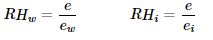
Saturation Water Vapor Pressure
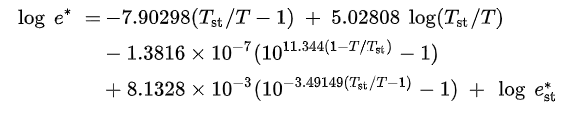
Saturation Water Vapor Pressure Over Ice
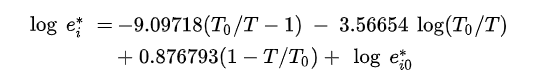

In [8]:
#Calculating Relative Humidity to Ice Steps
#1. Create an empty array to store the rh_ice values
#2. If not a null value proceed
#3. Standardize relative humidity to a decimal value
#4. Calculate saturation water vapor pressure
#5. Calculate saturation water vapor pressure over ice
#6.Calculate actual vapor pressure
#7. Calculate relative humidity to ice
#8. Return relative humidity to ice values

def relative_humidity_to_ice(temp_k, rh_w):
    
    # Initialize an empty array to store all calculations to be returned
    rh_ice = np.empty(len(temp_k))
    
    # Create a condition that if the value is not one of the following, the value is saved
    condition = (temp_k != -9999) & (temp_k != -8888) & (rh_w != -9999) & (rh_w != -8888)

    # Calculate rh_ice for non-null values
    t_non_null = temp_k[condition]
    #We divide first by 10 to standardize relative humidity (rh) to a percentage (ex: 11 = 1.1%). 
    #We than convert the percentage into a decimal value by dividing by 100. 
    rh_w_non_null = (rh_w[condition] / 10) / 100  
    
    # Ensure temperature is a non-zero number so we do not divide by 0. 
    t = t_non_null[t_non_null != 0]
    
    #Values needed for Goff-Gratch Equation
    t_st = 373.13 #steam-point temperature
    e_st = 1013.25 #steam-point pressure
    to = 273.16 #ice-point (triple point) temperature
    e_i0 = 6.1173 #ice-point pressure
    
    #Calculate log_ew (Saturation Water Vapor Pressure)
    log_ew = -7.90298 * (t_st / t - 1) + 5.02808 * np.log10(t_st / t) \
             - 1.3816e-7 * (10**(11.344 * (1 - t / t_st)) - 1) \
             + 8.1328e-3 * (10**(-3.49149 * (t_st / t - 1)) - 1) + np.log10(e_st)
    ew = np.exp(log_ew)
    
    #Calculate log_ei (Saturation Water Vapor Pressure Over Ice)
    log_ei = -9.09718 * (to / t - 1) - 3.56654 * np.log10(to / t) + 0.876793 * (1 - t / to) \
             + np.log10(e_i0)
    ei = np.exp(log_ei)

    #Calculate actual vapor pressure
    e_press = rh_w_non_null * ew
    
    #Calculcate relative humidity to ice
    rh_ice[condition] = e_press / ei
    
    #If value was -9999 or -8888, assigning -9999 value
    #~ denotes when the condition above is false and assigns them with -9999
    rh_ice[~condition] = -9999
    
    #Return all values calculated
    return rh_ice

### Drift Formula

In [9]:
# distance travelled = windspeed * elapsed time
# WSPD is the reported wind speed (meters per second to tenths, e.g., 11 = 1.1 m/s)
# ETIME	is the elapsed time since launch. The format is MMMSS, where MMM represents minutes and SS represents seconds, though values are not left-padded with zeros
# -8888 and -9999 are exceptions to both

def drift_dist(wspd, etime):

    drift = (wspd/10)*etime

    return drift

### Calculate New Latitude/Longitude from Drift Values
Latitude and Longitude
![lat_long.png](lat_long.png)

In [14]:
# WDIR is the reported wind direction (degrees from north, 90 = east)
# -8888 and -9999 are exceptions

R_earth = 6.3781e6  # Average Equatorial Radius of Earth in meters

def drift_coord(lat1, long1, bearing, distance):

    bearing_rad = bearing * np.pi/180         # Convert bearing from degrees to radians
    lat1_rad = (lat1/10000) * np.pi/180       # Normalize latitude decimal place and convert from degrees to radians
    long1_rad = (long1/10000) * np.pi/180     # Normalize longtitude decimal place and convert from degrees to radians

    ang_dist = distance/R_earth             # Angular Distance d/R

    lat2_rad = np.arcsin(np.sin(lat1_rad) * np.cos(ang_dist) * np.cos(lat1_rad) * np.sin(ang_dist) * np.cos(bearing))
    # New Latitude calculation in radians
    lat2_deg = lat2_rad * 180/np.pi     # Convert back to degrees


    long2_rad = long1_rad + np.arctan2((np.sin(bearing) * np.sin(ang_dist) * np.cos(lat1_rad), (np.cos(ang_dist) - (np.sin(lat1_rad) * np.sin(lat2_rad)))))
    # New Longtitude calculation in radians
    long2_deg = long2_rad * 180/np.pi     # Convert back to degrees
  
    return lat2_deg, long2_deg

print(drift_coord(408650, -728628, 5, 10))

TypeError: arctan2() takes from 2 to 3 positional arguments but 1 were given

### Capture When Temp below -42 Fahrenheit, RH above 100%, and pressure altitude below 43,000 feet

In [ ]:
#Function for ISSR
def issr(temp_f, rhi, press_alt):
    result = pd.Series('no', index = temp_f.index)
    
    result[(temp_f < -42) & (rhi > 1) & (press_alt < 43000)] = 'yes'
    
    return result

## Adding Conversions to DataFrames

### Filter to 2010-2024

In [ ]:
#Filtering dataset to 2010-2024 data to reduce need to add conversions to entire dataset
df_std = df_std[(df_std['year'] >= 2010) & (df_std['year'] <= 2024)]

### Adding Conversions to DataFrame

In [ ]:
#Fahrenheit - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition = (df_std['temp'] != -9999) & (df_std['temp'] != -8888)
df_std['temp_f'] = df_std['temp']
df_std.loc[condition, 'temp_f'] = df_std.loc[condition, 'temp_f'] /10 * (9/5) + 32

In [ ]:
#Kelvins - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition2 = (df_std['temp'] != -9999) & (df_std['temp'] != -8888)
df_std['temp_k'] = df_std['temp']
df_std.loc[condition2, 'temp_k'] = df_std.loc[condition2, 'temp_k'] / 10 + 273.15

In [ ]:
#Pressure Altitude - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition3 = (df_std['press'] != -9999) & (df_std['press'] != -8888)
df_std['press_alt'] = df_std['press'] / 100
df_std.loc[condition3, 'press_alt'] = round(((1 - (df_std.loc[condition3, 'press_alt'] / 1013.25) ** 0.190284) \
                                                * 145366.45), 2)

In [ ]:
#Relative Humidity to Ice - References Function
warnings.filterwarnings("ignore")
df_std['rh_ice'] = relative_humidity_to_ice(df_std['temp_k'], df_std['rh'])
df_std['rh_ice'] = df_std['rh_ice'].round(3)

In [ ]:
#ISSC - References Function
warnings.filterwarnings("ignore")
df_std['issc'] = issr(df_std['temp_f'], df_std['rh_ice'], df_std['press_alt'])

In [ ]:
#Drift - References Function


In [ ]:
#DataFrame with new added conversion columns
print(city)
df_std

Buffalo, NY


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
3090800,#USM00072528,2010,1,1,0,2300,185,ncdc6301,ncdc6301,429411,...,B,950,7,188,36,34.16,274.35,708.35,0.945,no
3090801,#USM00072528,2010,1,1,0,2300,185,ncdc6301,ncdc6301,429411,...,B,951,7,209,54,32.72,273.55,1036.88,0.949,no
3090802,#USM00072528,2010,1,1,0,2300,185,ncdc6301,ncdc6301,429411,...,B,953,7,223,69,32.00,273.15,1345.32,0.953,no
3090803,#USM00072528,2010,1,1,0,2300,185,ncdc6301,ncdc6301,429411,...,B,972,4,242,103,29.30,271.65,2498.86,0.978,no
3090804,#USM00072528,2010,1,1,0,2300,185,ncdc6301,ncdc6301,429411,...,B,958,6,240,101,22.46,267.85,4615.31,0.980,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106217,#USM00072528,2024,2,24,12,1107,199,ncdc-nws,,429411,...,B,5,398,56,215,-47.74,228.85,84998.23,0.006,no
5106218,#USM00072528,2024,2,24,12,1107,199,ncdc-nws,,429411,...,B,5,398,55,212,-47.56,228.95,85055.78,0.006,no
5106219,#USM00072528,2024,2,24,12,1107,199,ncdc-nws,,429411,...,B,5,393,55,188,-50.44,227.35,85899.41,0.006,no
5106220,#USM00072528,2024,2,24,12,1107,199,ncdc-nws,,429411,...,B,5,391,57,194,-51.34,226.85,86059.53,0.006,no


## Filter Dataset (Data from 2023 AND Pressure Altitude Under 43,000)

In [ ]:
#Filter and create new DataFrame. New U.S. DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
df_clean = df_std[(df_std['year'] == 2023) & (df_std['press_alt'] <= 43000)]

## Finalized Cleaned Datasets for Analysis

In [ ]:
#Final Clean Dataset that can be exported to csv, run basic statistics, and plot EDA. 
print(city)
df_clean

Buffalo, NY


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
4902417,#USM00072528,2023,1,1,0,2307,180,ncdc-nws,ncdc-gts,429411,...,B,930,10,224,41,43.88,279.75,881.32,0.905,no
4902418,#USM00072528,2023,1,1,0,2307,180,ncdc-nws,ncdc-gts,429411,...,B,1000,0,234,39,43.34,279.45,975.02,0.974,no
4902419,#USM00072528,2023,1,1,0,2307,180,ncdc-nws,ncdc-gts,429411,...,B,1000,0,238,79,42.80,279.15,1213.80,0.975,no
4902420,#USM00072528,2023,1,1,0,2307,180,ncdc-nws,ncdc-gts,429411,...,B,1000,0,243,99,43.34,279.45,1353.84,0.974,no
4902421,#USM00072528,2023,1,1,0,2307,180,ncdc-nws,ncdc-gts,429411,...,B,1000,0,246,113,46.58,281.25,1505.31,0.967,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081221,#USM00072528,2023,12,31,12,1109,223,ncdc-nws,ncdc-gts,429411,...,,-9999,-9999,35,77,-9999.00,-9999.00,-99.99,-9999.000,no
5081222,#USM00072528,2023,12,31,12,1109,223,ncdc-nws,ncdc-gts,429411,...,,-9999,-9999,30,67,-9999.00,-9999.00,-99.99,-9999.000,no
5081223,#USM00072528,2023,12,31,12,1109,223,ncdc-nws,ncdc-gts,429411,...,,-9999,-9999,5,93,-9999.00,-9999.00,-99.99,-9999.000,no
5081224,#USM00072528,2023,12,31,12,1109,223,ncdc-nws,ncdc-gts,429411,...,,-9999,-9999,345,87,-9999.00,-9999.00,-99.99,-9999.000,no


## Basic Statistics for Dataset

In [ ]:
#Calculating number of rows with null values
num_rows = len(df_clean)
null_rows = ((df_clean['rh_ice'].isin([-9999, -8888])) |
                                  (df_clean['temp'].isin([-9999, -8888])) |
                                  (df_clean['press'].isin([-9999, -8888]))).sum()
null_rows_percent = (null_rows / len(df_clean)) * 100
issr_count = len(df_clean[df_clean['issc'] == 'yes'])

#Number of null rows means that if a row had -8888 or -9999 values for rh_ice, temp, or pressure
print(f"Dataset Statistics for {city}:")
print("")
print("Number of rows in 2023 data:", num_rows)
print("Number of null rows: ", null_rows)
print("Percent of null rows: ", round(null_rows_percent, 2), "%")
print("Number of rows that meet ISS conditions: ", issr_count)

Dataset Statistics for Buffalo, NY:

Number of rows in 2023 data: 113971
Number of null rows:  44462
Percent of null rows:  39.01 %
Number of rows that meet ISS conditions:  235


## ISS Conditions Exploratory Data Analysis

### Number of occurrences of ISSC

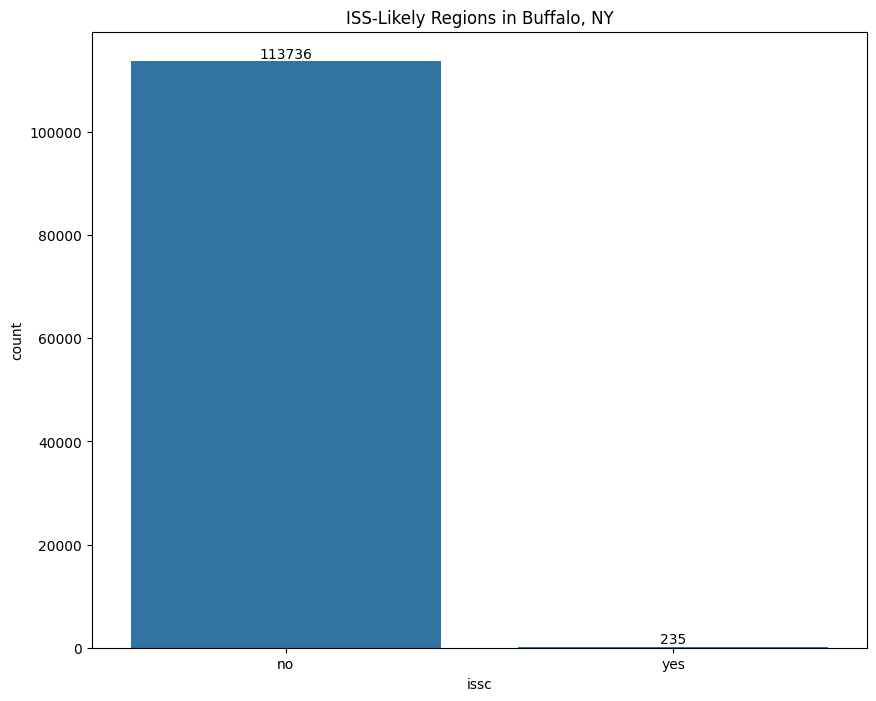

In [ ]:
#This plot shows the amount of times in our dataframe that ISSC was annotated as yes
plt.figure(figsize = (10, 8))

ax = sns.countplot(x = 'issc', data = df_clean)
ax.set(title = f'ISS-Likely Regions in {city}')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
           f'{int(p.get_height())}', ha = 'center', va = 'bottom')

#plt.savefig(f'{city}_issr_percent.png')

### ISS Conditions were present in the region X% days

In [ ]:
#This cell outputs a percentage of days ISSC occurred. 
issc_days_df = df_clean[df_clean['issc'] == 'yes']

# Drop duplicates based on date. This is so it only counts issc once per each day of occurrence.
unique_dates_df = issc_days_df.drop_duplicates(subset=['date'])

print(f"Number of days ISSC were present is in {city}:", unique_dates_df['issc'].count())
print(f"Percent of days ISSC were present in {city}:", round(unique_dates_df['issc'].count() / 365, 2) * 100, "%")


KeyError: Index(['date'], dtype='object')

### ISS Conditions were present in the region X% of days a month

In [ ]:
# This plots the amount of days per month ISSC occurred. 
plt.figure(figsize=(8, 5))
plt.hist(unique_dates_df['month'], bins=range(1, 14), align='left', rwidth=0.8)
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title(f'Number of Days Each Month ISSC Were Present in {city}')
plt.grid(axis='y')
plt.show()

### ISS Conditions were most prevalent during the XXX 12 hour window (midnight to noon, noon-midnight)

In [ ]:
#This plots the amount of times ISSC occurred between midnight to noon and noon to midnight
count_less_than_12 = issc_days_df[issc_days_df['hour'] < 12]['hour'].count()
count_12_and_up = issc_days_df[issc_days_df['hour'] >= 12]['hour'].count()

# Plot bar plot for counts
plt.figure(figsize=(8, 5))
plt.bar(['Midnight-Noon', 'Noon-Midnight'], [count_less_than_12, count_12_and_up])
plt.xlabel('Midnight versus Noon')
plt.ylabel('Count')
plt.title('ISSC Midnight versus Noon')
plt.grid(axis='y')
plt.show()

## Press_Alt vs RHI & Fahrenheit Visual 

In [ ]:
# This visual is created using a specific date 

# Filter data for specific date and remove rows with -9999 / -8888 in the 'rh_ice' column
visual_df = df_clean[(df_clean['month'] == 8) & (df_clean['day'] == 8) & (df_clean['rh_ice'] > 0)]

# Create figure and axes objects
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Split the data based on 'hour' (0 for midnight, 12 for noon)
midnight_launch = visual_df[visual_df['hour'] == 0]
noon_launch = visual_df[visual_df['hour'] == 12]

axs[0].plot(midnight_launch['temp_f'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
axs[0].plot(noon_launch['temp_f'], noon_launch['press_alt'], 'g-', label='Noon Launch')

axs[1].plot(midnight_launch['rh_ice'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
axs[1].plot(noon_launch['rh_ice'], noon_launch['press_alt'], 'g-', label='Noon Launch')

# Find the critical points where both temp_f is less than -42 and rh_ice is greater than 1
critical_midnight = midnight_launch[(midnight_launch['temp_f'] < -42) & (midnight_launch['rh_ice'] > 1)]
critical_noon = noon_launch[(noon_launch['temp_f'] < -42) & (noon_launch['rh_ice'] > 1)]

# Plotting the critical points with red dots on both axes
for dataset, label in zip([critical_midnight, critical_noon], ['Midnight', 'Noon']):
    if not dataset.empty:
        critical_point = dataset.iloc[0]

        # Plot the red dot on the left graph (Temperature vs Pressure Altitude)
        axs[0].plot(critical_point['temp_f'], critical_point['press_alt'], 'ro', label= 'ISSC')

        # Plot the red dot on the right graph (Relative Humidity to Ice vs Pressure Altitude)
        axs[1].plot(critical_point['rh_ice'], critical_point['press_alt'], 'ro', label = 'ISSC')

# labels, legends, and titles for the left axes (Temperature vs Pressure Altitude)
axs[0].set_xlabel('Temperature (°F)')
axs[0].set_ylabel('Pressure Altitude')
axs[0].axvline(x=-42, color='blue', linestyle='--')
axs[0].legend()

# labels, legends, and titles for the right axes (Relative Humidity to Ice vs Pressure Altitude)
axs[1].set_xlabel('Relative Humidity to Ice (rhi)')
axs[1].set_ylabel('Pressure Altitude')
axs[1].axvline(x=1, color='blue', linestyle='--')
axs[1].legend()

# Titles 
axs[0].set_title('Pressure Altitude vs Temperature (8 / 8 / 2023)')
axs[1].set_title('Pressure Altitude vs Relative Humidity to Ice (8 / 8 / 2023)')

plt.tight_layout()
plt.show()


In [ ]:
# This cell creates the above visual for each day that has at least one issc = 'yes'

# Group by 'month' and 'day' and filter groups that have 'yes' in 'issc' column
grouped = df_clean.groupby(['month', 'day'])
days_to_plot = [name for name, group in grouped if (group['issc'] == 'yes').any()]

# loop through the filtered days and plot the visuals
for (month, day) in days_to_plot:
    visual_df_2 = df_clean[(df_clean['month'] == month) & (df_clean['day'] == day) & (df_clean['rh_ice'] > 0)]
    
    # Check if there is any data to plot for this day
    if not visual_df_2.empty:
        # Create figure and axes objects
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        
        # Split the data based on 'hour' (0 for midnight, 12 for noon)
        midnight_launch = visual_df_2[visual_df_2['hour'] == 0]
        noon_launch = visual_df_2[visual_df_2['hour'] == 12]
        
        axs[0].plot(midnight_launch['temp_f'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
        axs[0].plot(noon_launch['temp_f'], noon_launch['press_alt'], 'g-', label='Noon Launch')
        
        axs[1].plot(midnight_launch['rh_ice'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
        axs[1].plot(noon_launch['rh_ice'], noon_launch['press_alt'], 'g-', label='Noon Launch')
        
        # Find the critical points where both temp_f is less than -42 and rh_ice is greater than 1
        critical_midnight = midnight_launch[(midnight_launch['temp_f'] < -42) & (midnight_launch['rh_ice'] > 1)]
        critical_noon = noon_launch[(noon_launch['temp_f'] < -42) & (noon_launch['rh_ice'] > 1)]
        
        # Select the first and last critical points for Midnight
        if not critical_midnight.empty:
            critical_points_midnight = critical_midnight.iloc[[0, -1]]
        else:
            critical_points_midnight = critical_midnight
    
        # Select the first and last critical points for Noon
        if not critical_noon.empty:
            critical_points_noon = critical_noon.iloc[[0, -1]]
        else:
            critical_points_noon = critical_noon
        
        # Plotting the critical pointson both axes
        for critical_points, color in zip([critical_points_midnight, critical_points_noon], ['r', 'g']):
            for index, critical_point in critical_points.iterrows():
            # Plot on the left graph 
                axs[0].plot(critical_point['temp_f'], critical_point['press_alt'], color + 'o', label='ISSC')
            
            # Plot on the right graph 
                axs[1].plot(critical_point['rh_ice'], critical_point['press_alt'], color + 'o', label='ISSC')
        
        # Set labels, legends, and titles
        axs[0].set_xlabel('Temperature (°F)')
        axs[0].set_ylabel('Pressure Altitude')
        axs[0].axvline(x=-42, color='blue', linestyle='--')
        axs[0].legend()
        
        axs[1].set_xlabel('Relative Humidity to Ice (rhi)')
        axs[1].set_ylabel('Pressure Altitude')
        axs[1].axvline(x=1, color='blue', linestyle='--')
        axs[1].legend()
        
        # Titles with the current day
        axs[0].set_title(f'Pressure Altitude vs Temperature ({month} / {day} / 2023)')
        axs[1].set_title(f'Pressure Altitude vs Relative Humidity to Ice ({month} / {day} / 2023)')
        
        plt.tight_layout()
        plt.show()


## Adding Floor and Ceiling Binary Attributes 

In [ ]:
# Add 'floor' and 'ceiling' columns to the DataFrame with default values of 0.
df_clean['floor'] = 0
df_clean['ceiling'] = 0

# Identify the first and last 'yes' entries in the 'issc' column for each day.

def identify_floor_ceiling(group):
    # Identify the index of the first and last 'yes' in 'issc' for each group
    issc_yes_indices = group.index[group['issc'] == 'yes'].tolist()
    if issc_yes_indices:
        altitude_value = group.loc[issc_yes_indices[0], 'press_alt']
        altitude_value2 = group.loc[issc_yes_indices[-1], 'press_alt']
        
        # If there's only one 'yes' entry, mark it as both floor and ceiling
        if len(issc_yes_indices) == 1:
            group.loc[issc_yes_indices[0], 'floor'] = altitude_value
            group.loc[issc_yes_indices[0], 'ceiling'] = altitude_value
        else:
            # Mark the first and last 'yes' entries appropriately
            group.loc[issc_yes_indices[0], 'floor'] = altitude_value
            group.loc[issc_yes_indices[-1], 'ceiling'] = altitude_value2
    return group

# Applying the function to each group
df_clean = df_clean.groupby(['month', 'day', 'hour']).apply(identify_floor_ceiling)

df_clean[df_clean['issc'] == 'yes']

In [ ]:
#This cell plots all ceiling and floors for each day ISSC occurred. 
issc_yes_df = df_clean[df_clean['issc'] == 'yes']

grouped_data = issc_yes_df.groupby('month')

for month, group in grouped_data:
    agg_df = group.groupby("date").agg({'ceiling': 'max', 'floor': 'max'}).reset_index()

    plt.figure(figsize=(6,4))
    plt.plot(agg_df['date'], agg_df['ceiling'], color='red', label='Ceiling')
    plt.plot(agg_df['date'], agg_df['floor'], color='blue', label='Floor')
    plt.xlabel('Date')
    plt.ylabel('Pressure Altitude')
    plt.title(f"Ceiling and Floor for ISS Days in {city} - Month {month}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
#This cell plots the exact points for each ceiling and floor. These plots offer a little more granularity compared to
#the previous plot. This is because these plots plot multiple occurences of ISSC in a day. 
for month, group in grouped_data:
    plt.figure(figsize=(10, 6))
    
    # Replace zero values with NaN. This makes sure that values of 0 are not included in plot.
    group['ceiling'] = group['ceiling'].replace(0, np.nan)
    group['floor'] = group['floor'].replace(0, np.nan)
    
    #Assign a variable that stores values when ceiling and floor are the same
    same_values = group['ceiling'] == group['floor']
    
    #Plots points where they are different for ceiling
    plt.scatter(group.loc[~same_values, 'date'], group.loc[~same_values, 'ceiling'],\
                color='red', label='Ceiling', alpha=0.5)
    
    #Plots points where they are different for floor
    plt.scatter(group.loc[~same_values, 'date'], group.loc[~same_values, 'floor'],\
                color='blue', label='Floor', alpha=0.5)
    
    #Plots points where they are the same for floor and ceiling
    plt.scatter(group.loc[same_values, 'date'], group.loc[same_values, 'ceiling'],\
                color='green', label='Same Values Ceiling & Floor', alpha=0.5)
    
    plt.xlabel('Date')
    plt.ylabel('Pressure Altitude')
    plt.title(f'Ceiling and Floor for ISS Days in {city}- Month {month}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
#This cell plots the monthly averages of ceiling and floor 
ceiling_val = issc_yes_df[issc_yes_df['ceiling'] != 0].groupby('month').agg({'ceiling': 'mean'}).reset_index()
floor_val = issc_yes_df[issc_yes_df['floor'] != 0].groupby('month').agg({'floor': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))

plt.plot(ceiling_val['month'], ceiling_val['ceiling'], color='red', marker='o', label='Ceiling')

plt.plot(floor_val['month'], floor_val['floor'], color='blue', marker='o', label='Floor')

plt.xlabel('Month')
plt.ylabel('Average Pressure Altitude (hPa)')
plt.title(f'Monthly Averages of Ceiling and Floor for {city}')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

## Export to CSV

In [ ]:
#df_clean.to_csv(f'{city}_issr2023.csv', index = False)

In [ ]:
#Exported DataFrame
df_clean